## Курсовой проект: "Предсказание цен на жильё"

In [236]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
%matplotlib inline

**Загрузка данных для расчёта проекта**

In [237]:
X = pd.read_csv('train.csv')
y = pd.DataFrame({'Price': X['Price']})

In [238]:
X.drop(columns='Price', inplace=True)

In [239]:
X_test = pd.read_csv('test.csv')

In [240]:
X.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B


**Описание датасета:**

**Id** - идентификационный номер квартиры<br>
**DistrictId** - идентификационный номер района<br>
**Rooms** - количество комнат<br>
**Square** - площадь<br>
**LifeSquare** - жилая площадь<br>
**KitchenSquare** - площадь кухни<br>
**Floor** - этаж<br>
**HouseFloor** - количество этажей в доме<br>
**HouseYear** - год постройки дома<br>
**Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности<br>
**Social_1, Social_2, Social_3** - социальные показатели местности<br>
**Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья<br>
**Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров<br>
**Price** - цена квартиры<br>

**Определение наличия пропусков**

In [241]:
X.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [242]:
#данные признаков(там где пропуски) 'LifeSquare' и 'Healthcare_1' в дальнейшем будут заменены на медиану

**Выявление выбросов аналитическим методом**

In [243]:
X.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


In [244]:
#1. обращаем внимание на значения минимум и максимум - выбираем квантиль 2,5% от минимума и максимума и заменим
# данные значения медианой
#2. все нулевые значения заменяем медианой
#3. сравниваем квадратные метры: общая плащадь, жилая и кухня. После преобразований общая плащадь должна быть
# больше или равна сумме плащадей жилой и кухни
#4. сравниваем этажи: жилой этаж не должен превышать этажность дома
#5. выявляем категориальные признаки с буквенными данным для дальнейшей замены на тип boolean(бинарные)

**Создание класса для преобразования данных**

In [245]:
class DataPrepare:


    def __init__(self):
        self.medians = None
        self.HouseYear_median = None
        self.Rooms_median = None
        self.Square_median = None
        self.LifeSquare_median = None
        self.KitchenSquare_median = None
        self.HouseFloor_median = None
        
    
    def fit(self, df):
        # вычисление медианы (только по данным файла test)
        self.medians = df[['LifeSquare', 'Healthcare_1']].median()
        self.HouseYear_median = df['HouseYear'].median()
        self.Rooms_median = df['Rooms'].median()
        self.Square_median = df['Square'].median()
        self.LifeSquare_median = df['LifeSquare'].median()
        self.KitchenSquare_median = df['KitchenSquare'].median()
        self.HouseFloor_median = df['HouseFloor'].median()
        self.Floor_median = df['Floor'].median()
        
        
    def transform(self, df):
        #замена типа данных
        df['HouseFloor'] = df['HouseFloor'].astype(int)
        
        #заполнение пропусков
        df[['LifeSquare', 'Healthcare_1']] = df[['LifeSquare', 'Healthcare_1']].fillna(self.medians)
        
        #заполнение выбросов
        df.loc[df['HouseYear'] > 2022, 'HouseYear'] = int(self.HouseYear_median)
        df.loc[df['Rooms'] <= 0, 'Rooms'] = int(self.Rooms_median)
        df.loc[df['Rooms'] > 5, 'Rooms'] = int(self.Rooms_median)
        square_min_value = np.quantile(df['Square'], q=0.025)
        df.loc[df['Square'] < square_min_value, 'Square'] = self.Square_median
        square_max_value = np.quantile(df['Square'], q=0.975)
        df.loc[df['Square'] > square_max_value, 'Square'] = self.Square_median
        lifesquare_min_value = np.quantile(df['LifeSquare'], q=0.025)
        df.loc[df['LifeSquare'] < lifesquare_min_value, 'LifeSquare'] = self.LifeSquare_median
        lifesquare_max_value = np.quantile(df['LifeSquare'], q=0.975)
        df.loc[df['LifeSquare'] > lifesquare_max_value, 'LifeSquare'] = self.LifeSquare_median
        df.loc[df['Square'] < df['LifeSquare'], 'LifeSquare'] = df.loc[df['Square'] < df['LifeSquare'], 'Square'] #здесь идет замена из расчета, что ошибка в колонке LifeSquare и ниже мы еще раз скорректируем LifeSquare
        df.loc[df['KitchenSquare'] <= 0, 'KitchenSquare'] = self.KitchenSquare_median
        df.loc[df['KitchenSquare'] <= 3, 'KitchenSquare'] = 3
        kitchensquare_max_value = np.quantile(df['KitchenSquare'], q=0.975)
        df.loc[df['KitchenSquare'] > kitchensquare_max_value, 'KitchenSquare'] = self.KitchenSquare_median
        df.loc[df['KitchenSquare'] + df['LifeSquare'] > df['Square'], 'LifeSquare'] = df['Square'] - df['KitchenSquare']
        df.loc[df['Floor'] <= 0, 'Floor'] = int(self.Floor_median)
        df.loc[df['HouseFloor'] <= 0, 'HouseFloor'] = int(self.HouseFloor_median)
        housefloor_max_value = np.quantile(df['HouseFloor'], q=0.975)
        df.loc[df['HouseFloor'] > housefloor_max_value, 'HouseFloor'] = int(self.HouseFloor_median)
        df.loc[df['Floor'] > df['HouseFloor'], 'Floor'] = df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor']
        
        #преобразование категориальных признаков
        df.replace({'Ecology_2': {'A': 0, 'B': 1}, 'Ecology_3': {'A': 0, 'B': 1}, 'Shops_2': {'A': 0, 'B': 1}}, inplace = True)
        
        #удаление столбца 'Id'
        df = df.drop(['Id'], axis=1)
        
        return df
    

**Разбиение основного датасета на тренировочный и валидационный и обработка данных**

In [246]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [247]:
a = DataPrepare()

In [248]:
a.fit(X) #вычисление медианы ряда показателей основного датасета

In [249]:
train = a.transform(X_train) #заполнение пропусков, замена выбросов на медиану и преобразование категориальных буквенных данных в бинарные(0/1)

In [250]:
train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000,7500.000000,7500.000000
mean,50.416133,1.883467,54.900415,33.746507,6.391333,7.798800,12.730267,1984.674667,0.117640,0.989733,0.972800,24.605733,5332.234533,7.914133,1024.02400,1.311067,4.180933,0.917200
std,43.718953,0.810498,15.046167,10.363643,2.604745,5.055069,6.011383,18.391297,0.119138,0.100810,0.162677,17.562436,4015.545522,23.504289,745.84684,1.492359,4.760786,0.275598
min,0.000000,1.000000,32.101733,14.831255,3.000000,1.000000,1.000000,1912.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,42.363683,27.590171,3.000000,4.000000,9.000000,1973.750000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,830.00000,0.000000,1.000000,1.000000
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,900.00000,1.000000,3.000000,1.000000
75%,75.000000,2.000000,64.460844,37.711121,8.000000,11.000000,17.000000,2000.000000,0.194489,1.000000,1.000000,36.000000,7227.000000,5.000000,990.00000,2.000000,5.000000,1.000000
max,209.000000,5.000000,98.994909,76.081776,12.000000,25.000000,25.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.00000,6.000000,23.000000,1.000000


In [251]:
valid = a.transform(X_valid)#заполнение пропусков, замена выбросов на медиану и преобразование категориальных буквенных данных в бинарные(0/1)

In [252]:
valid.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,50.354800,1.903200,55.739832,34.311574,6.497600,8.147600,13.070800,1985.431200,0.122511,0.992000,0.971600,24.930800,5411.926000,8.414400,1033.363600,1.344800,4.382400,0.918400
std,43.199771,0.812708,15.716945,10.964143,2.660381,5.256164,6.080179,18.457972,0.118634,0.089102,0.166146,17.444074,3980.648735,24.789717,749.211327,1.497334,4.938373,0.273809
min,0.000000,1.000000,32.271741,15.920343,3.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,42.588675,28.381302,5.000000,4.000000,9.000000,1975.000000,0.033494,1.000000,1.000000,8.000000,1892.000000,0.000000,810.000000,0.000000,1.000000,1.000000
50%,35.500000,2.000000,52.513310,32.781260,6.000000,7.000000,14.000000,1977.000000,0.075779,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000
75%,74.000000,2.000000,65.040372,38.224867,9.000000,12.000000,17.000000,2002.000000,0.200147,1.000000,1.000000,35.000000,7287.000000,5.000000,1015.000000,3.000000,6.000000,1.000000
max,208.000000,5.000000,104.049130,79.804872,13.000000,25.000000,25.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000


In [253]:
test = a.transform(X_test)#заполнение пропусков, замена выбросов на медиану и преобразование категориальных буквенных данных в бинарные(0/1)

In [254]:
test.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,51.279200,1.906200,55.430000,33.985317,6.409400,7.994400,12.760200,1984.392600,0.119874,0.990400,0.970200,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800,0.917600
std,44.179466,0.805935,15.290075,10.417572,2.590277,5.186612,6.040993,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365,0.275001
min,0.000000,1.000000,32.113449,14.525566,3.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,21.000000,1.000000,42.703356,28.029077,5.000000,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,1.000000
50%,37.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,1.000000
75%,77.000000,2.000000,65.215668,38.303552,8.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,1.000000
max,212.000000,5.000000,100.729995,76.657732,12.000000,25.000000,25.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000


**Уменьшение объёма памяти, который занимает датасет**

In [255]:
def reduce_mem_usage(df): #данная функция была взята из урока
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [256]:
train = reduce_mem_usage(train)
valid = reduce_mem_usage(valid)
test = reduce_mem_usage(test)

Memory usage of dataframe is 1.34 MB
Memory usage after optimization is: 0.60 MB
Decreased by 55.5%
Memory usage of dataframe is 0.43 MB
Memory usage after optimization is: 0.18 MB
Decreased by 58.3%
Memory usage of dataframe is 0.69 MB
Memory usage after optimization is: 0.19 MB
Decreased by 72.2%


**Выявление выбросов графическим методом**

In [257]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

График целевой переменной

<Figure size 720x720 with 0 Axes>

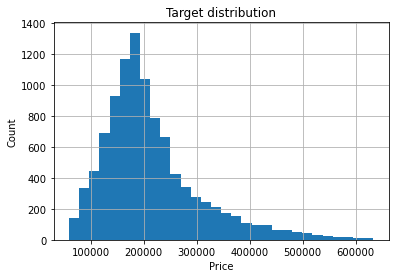

In [258]:
plt.figure(figsize = (10, 10))
y.hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Target distribution')
plt.show()

In [259]:
#целевая переменная явных выбросов не имеет

array([[<AxesSubplot:title={'center':'DistrictId'}>,
        <AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>,
        <AxesSubplot:title={'center':'LifeSquare'}>],
       [<AxesSubplot:title={'center':'KitchenSquare'}>,
        <AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>,
        <AxesSubplot:title={'center':'HouseYear'}>],
       [<AxesSubplot:title={'center':'Ecology_1'}>,
        <AxesSubplot:title={'center':'Ecology_2'}>,
        <AxesSubplot:title={'center':'Ecology_3'}>,
        <AxesSubplot:title={'center':'Social_1'}>],
       [<AxesSubplot:title={'center':'Social_2'}>,
        <AxesSubplot:title={'center':'Social_3'}>,
        <AxesSubplot:title={'center':'Healthcare_1'}>,
        <AxesSubplot:title={'center':'Helthcare_2'}>],
       [<AxesSubplot:title={'center':'Shops_1'}>,
        <AxesSubplot:title={'center':'Shops_2'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

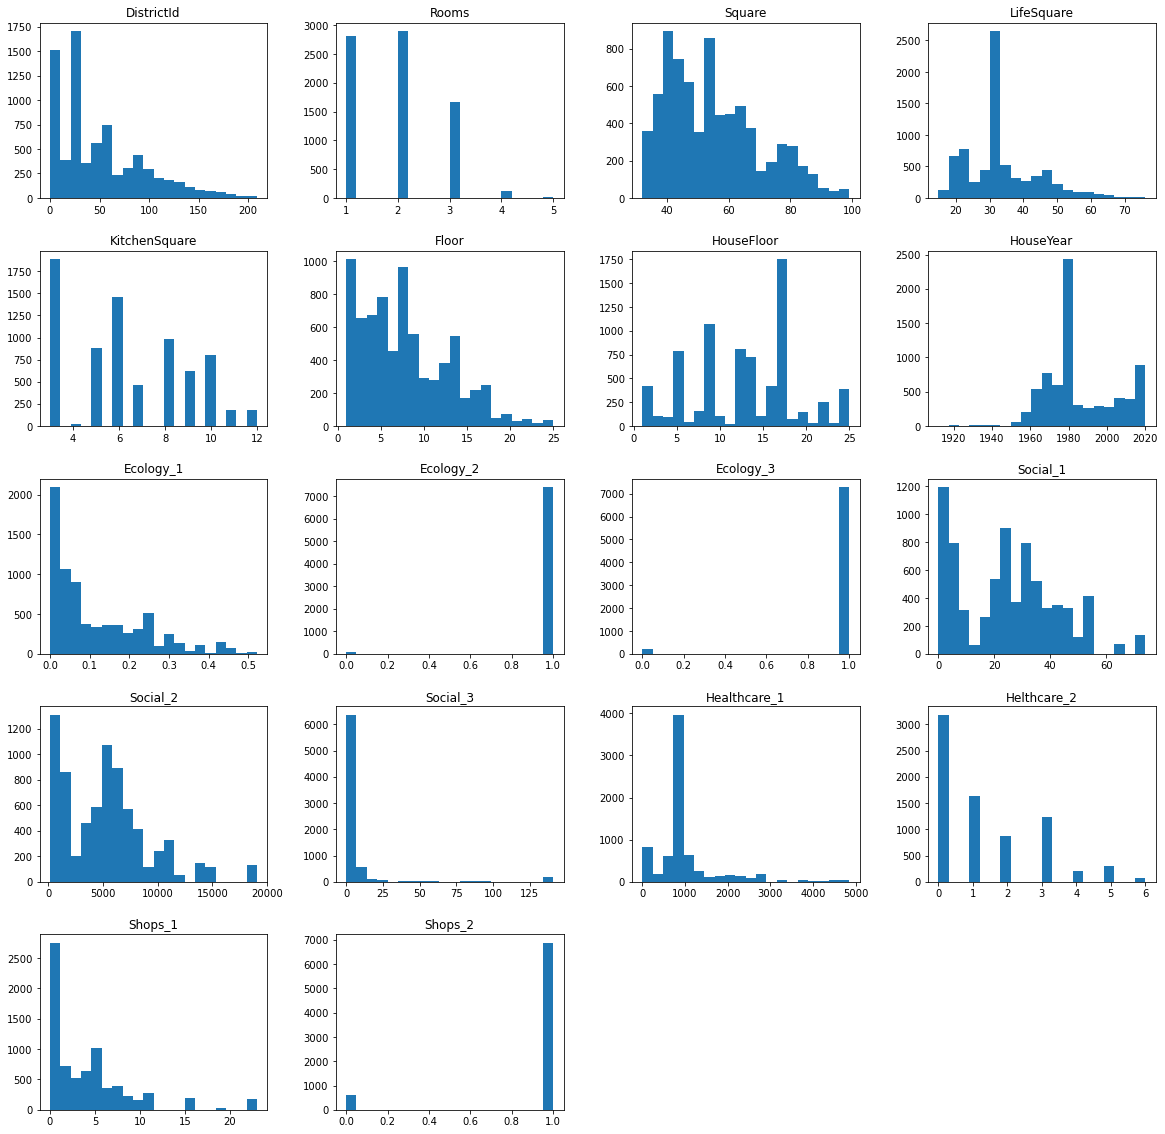

In [260]:
train.hist(figsize=(20, 20), bins=20, grid=False)

In [261]:
#явных выбросов не выявлено, изменять данные не будем(позже, для поиска лучшей подгодовки данных из датасета были 
# удалены 'Shops_2', 'Social_3', 'Ecology_2', 'Ecology_3', а также были добавлены новые признаки на основе 'DistrictId', 
# но данные изменения не принесли улучшений в расчетах, поэтому датасету был возвращён первоначальный вид)

**Стандартизация значений параметров датасета**

In [268]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)

StandardScaler()

In [269]:
def std(df):#функция для стандартизации датафрейма
    df = pd.DataFrame(scaler.transform(df), columns = df.columns)
    return df

In [270]:
train_std = std(train)
test_std = std(test)
valid_std = std(valid)

In [271]:
train_std.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,1.111351,0.143789,0.163003,0.253662,1.001572,0.039804,0.211236,0.724594,-0.706334,0.101849,0.167214,2.357135,1.305206,-0.294184,0.399540,1.131796,0.802246,0.300458
1,-0.055269,1.377680,1.648701,1.359205,1.385513,1.424645,0.710322,-0.036686,-0.642279,0.101849,0.167214,1.218265,1.041713,-0.123991,-0.166297,-0.208454,1.222373,0.300458
2,2.277971,0.143789,-0.509778,-0.318825,-0.150249,0.435473,-0.121489,-0.743590,-0.813380,0.101849,0.167214,-0.034493,0.069924,-0.123991,0.423676,0.461671,0.172056,0.300458
3,-1.016015,-1.090102,-1.047066,0.231655,-1.302070,1.820314,0.710322,1.757760,1.054012,0.101849,0.167214,-1.116419,-0.938474,-0.336733,-0.649002,-0.878578,-0.878261,0.300458
4,-1.061764,0.143789,-0.618483,-0.362862,-0.534189,-0.553699,-1.286024,-1.287361,-0.634666,0.101849,0.167214,0.705773,0.379492,3.237322,1.228184,0.461671,0.172056,0.300458


In [272]:
valid_std.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,-1.084639,1.377680,3.121421,-0.093144,1.769453,-0.158030,0.377598,1.540251,-0.560223,0.101849,0.167214,1.047434,1.317161,-0.294184,-1.332834,0.461671,-0.248071,0.300458
1,-0.650016,-1.090102,2.165826,-0.093144,-0.150249,1.028976,0.044873,-0.417327,0.007536,0.101849,0.167214,0.307168,0.217859,-0.294184,0.213163,-0.208454,-0.878261,0.300458
2,2.323721,0.143789,-0.947182,-1.105654,0.233692,-0.355865,-0.620575,-1.124230,-0.634666,0.101849,0.167214,0.705773,0.379492,3.237322,1.228184,0.461671,0.172056,0.300458
3,-0.215393,-1.090102,-0.796975,-1.237406,1.001572,1.226811,0.543960,-0.254195,0.481953,0.101849,0.167214,0.648830,1.176199,-0.209088,-0.166297,-0.208454,-0.878261,0.300458
4,0.059106,-1.090102,-1.315520,-1.118516,1.001572,-0.553699,-0.121489,-0.961098,-0.570823,0.101849,0.167214,0.534943,0.604383,-0.336733,-1.066006,-0.208454,-0.248071,0.300458


In [273]:
test_std.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,-0.146768,-1.090102,-1.199906,-1.413914,-0.534189,-0.553699,-0.620575,-0.797967,-0.684269,0.101849,0.167214,-0.034493,-0.237651,-0.336733,0.016058,-0.208454,-0.668197,0.300458
1,0.264980,-1.090102,-0.824618,-0.120873,1.385513,-0.158030,0.710322,1.757760,-0.381783,0.101849,0.167214,-1.287250,-1.171335,-0.294184,-0.166297,-0.878578,-0.878261,-3.328257
2,-0.535642,0.143789,0.303304,-0.093144,1.001572,2.215983,1.043046,-0.417327,0.787050,0.101849,0.167214,-0.888645,-0.856786,-0.336733,-0.166297,-0.878578,-0.668197,0.300458
3,-0.627141,1.377680,-0.349241,0.014216,-0.150249,-1.147202,-1.785110,-1.069853,-0.869355,0.101849,0.167214,-1.287250,-1.209688,-0.336733,-0.166297,-0.878578,-0.878261,0.300458
4,0.539479,-1.090102,-0.070678,-0.093144,-1.302070,0.039804,0.710322,-0.417327,1.610332,0.101849,0.167214,0.591886,0.593425,-0.166540,-0.045621,-0.878578,0.382119,0.300458


**Построение и выбор модели (в проекте останется только лучшая из нескольких моделей)**

In [274]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [275]:
def evaluate_preds(true_values, pred_values):#данная функция была взята из урока
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)))
    
    plt.figure(figsize=(8,8))
    
    plt.scatter(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    plt.show()

In [ ]:
#были проанализированны следующие модели:
#LinearRegression
#RandomForestRegressor
#GradientBoostingRegressor
#для моделей RandomForestRegressor и GradientBoostingRegressor при помощи GridSearchCV были определены лучшие
#показатели из 70 возможных
#В конченом итоге была выбрана модель с лучшим показателем R2 - GradientBoostingRegressor

R2:	0.897


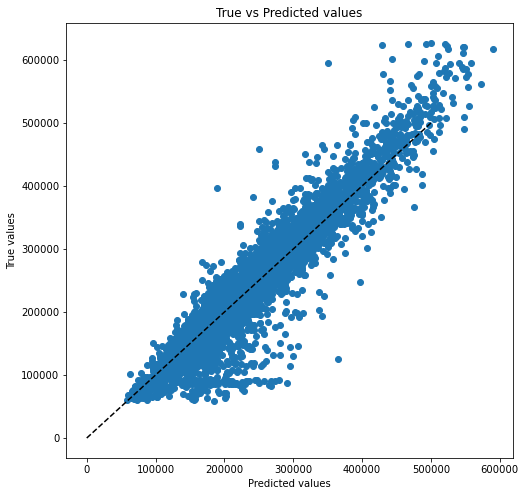

In [295]:
gb_model = GradientBoostingRegressor(max_depth=7,
                                     min_samples_leaf=25,
                                     random_state=42,  
                                     n_estimators=200)
gb_model.fit(train, y_train)
y_train_preds = gb_model.predict(train)
evaluate_preds(y_train, y_train_preds)

R2:	0.728


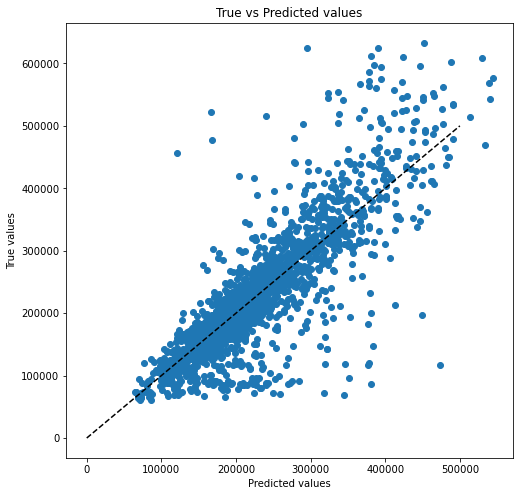

In [296]:
y_valid_preds = gb_model.predict(valid)
evaluate_preds(y_valid, y_valid_preds)

**Расчет цен для квартир на тестовом датасете**

In [297]:
y_test = gb_model.predict(test)

In [299]:
y_test

array([158200.84056395, 127837.51243243, 145371.67646167, ...,
       149237.61312363, 185251.67519908, 262314.79784128])

In [308]:
df_y_test = pd.DataFrame({'Id': X_test['Id'], 'Price': y_test})

In [309]:
df_y_test.head()

,id,Price
0,4567,158200.840564
1,5925,127837.512432
2,960,145371.676462
3,3848,182779.490902
4,746,156935.243913


In [311]:
df_y_test.to_csv('test_price_final.csv', index = False)